In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('clash_wiki_dataset.csv', index_col=0)
print(df.head())
print(df.info())

            Card Level (Spawn Level)  Cost Count  Crown Tower Damage Damage  \
Card                                                                          
Archers                          NaN   3.0     2                 NaN     86   
Baby Dragon                      NaN   4.0     1                 NaN    133   
Balloon                          NaN   5.0     1                 NaN    798   
Bandit                           NaN   3.0     1                 NaN    160   
Barbarians                       NaN   5.0     4                 NaN    159   

            Damage per second  Death Damage Health (+Shield) Hit Speed  Level  \
Card                                                                            
Archers                    71           0.0              254       1.2    9.0   
Baby Dragon                83           0.0            1,064       1.6    4.0   
Balloon                   266         272.0            1,396         3    4.0   
Bandit                    160           0

In [13]:
df.drop(['Card Level (Spawn Level)'], axis=1, inplace=True)
df.drop(['Golemite', 'Lava Pup'], inplace=True)
df['Count'].fillna(1, inplace=True)
#df['Crown Tower Damage'].fillna(df.Damage, inplace=True)
#df['Crown Tower Damage'].fillna(0, inplace=True)
df['Damage'].fillna(0, inplace=True)
df['Damage per second'].fillna(0, inplace=True)
df['Death Damage'].fillna(0, inplace=True)
df['Health (+Shield)'].fillna(0, inplace=True)
df['Hit Speed'].fillna(0, inplace=True)
df['Range'].fillna(0, inplace=True)
df['Radius'].fillna(0, inplace=True)


In [14]:
#Adding some missing stats to the dataframe from the game
df.at['Goblin Gang', 'Count'] = 5
df['Count'] = df.Count.astype(float)
df.at['Goblin Gang', 'Damage'] = 79.8
df.at['Inferno Dragon', 'Damage'] = 200
df.at['Inferno Tower', 'Damage'] = 500
df.at['Sparky', 'Damage'] = 1300
df.at['Rocket', 'Damage'] = 1232

df['Damage'] = df.Damage.astype(float)
df['Crown Tower Damage'].fillna(df.Damage, inplace=True)
df['Crown Tower Damage'].fillna(0, inplace=True)
df['Crown Tower Damage'] = df['Crown Tower Damage'].astype(float)

df.at['Goblin Gang', 'Damage per second'] = 59.4
df.at['Inferno Dragon', 'Damage per second'] = 150
df.at['Inferno Tower', 'Damage per second'] = 800
df['Damage per second'] = df['Damage per second'].astype(float)


In [15]:

df['Health (+Shield)'] = df['Health (+Shield)'].str.replace(',', '')
df.at['Barbarian Hut', 'Health (+Shield)'] = 1936
df.at['Furnace', 'Health (+Shield)'] = 1003
df.at['Tombstone', 'Health (+Shield)'] = 422
df.at['Cannon Cart', 'Health (+Shield)'] = 1392
df.at['Dark Prince', 'Health (+Shield)'] = 1243
df.at['Guards', 'Health (+Shield)'] = 285
df.at['Goblin Gang', 'Health (+Shield)'] = 132.8
df['Health (+Shield)'].fillna(0, inplace=True)
df['Health (+Shield)'] = df['Health (+Shield)'].astype(float)

df.at['Goblin Gang', 'Hit Speed'] = 1.46
df['Hit Speed'] = df['Hit Speed'].astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, Archers to Zap
Data columns (total 19 columns):
Cost                  68 non-null float64
Count                 68 non-null float64
Crown Tower Damage    68 non-null float64
Damage                68 non-null float64
Damage per second     68 non-null float64
Death Damage          68 non-null float64
Health (+Shield)      68 non-null float64
Hit Speed             68 non-null float64
Level                 62 non-null float64
Maximum Spawned       6 non-null float64
Radius                68 non-null float64
Range                 68 non-null object
Spawn DPS             6 non-null float64
Spawn Damage          6 non-null float64
Spawn Health          6 non-null float64
Spawn Speed           6 non-null float64
Spawner Health        6 non-null object
Troop Spawned         6 non-null object
Type                  68 non-null object
dtypes: float64(15), object(4)
memory usage: 13.1+ KB
None


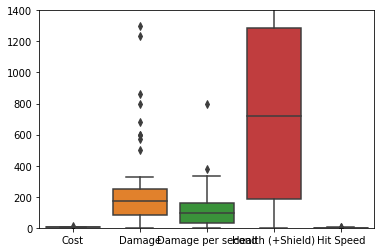

In [16]:
main_stats = df.drop(['Count', 'Crown Tower Damage', 'Death Damage', 'Level', 'Maximum Spawned', 'Radius', 
                     'Range', 'Spawn DPS', 'Spawn Damage', 'Spawn Health', 'Spawner Health', 'Troop Spawned',
                      'Spawn Speed'], axis=1)
sns.boxplot(data=main_stats)
plt.ylim(0,1400)

plt.show()


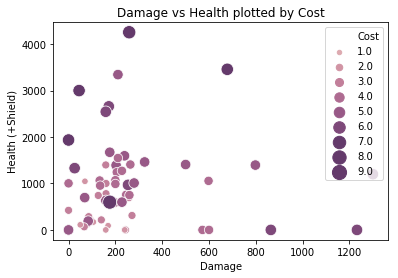

In [17]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='Damage', y='Health (+Shield)', hue='Cost',size='Cost', palette=cmap, sizes=(20, 200), hue_norm=(0, 7),legend='full', data=main_stats)
plt.title('Damage vs Health plotted by Cost')
plt.show()

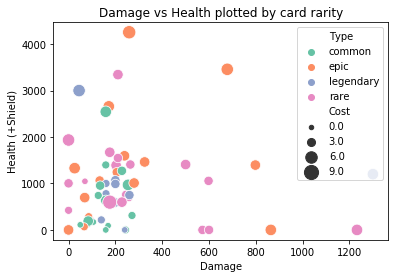

In [18]:
sns.scatterplot(x='Damage', y='Health (+Shield)', hue='Type',size='Cost', palette='Set2', sizes=(20, 200), data=main_stats)
plt.title('Damage vs Health plotted by card rarity')
plt.show()

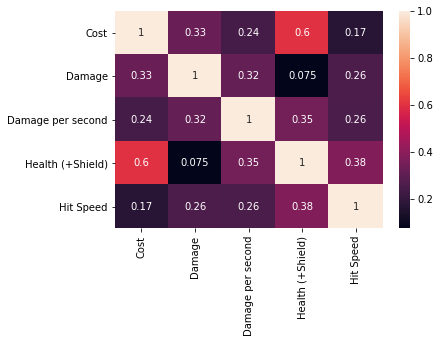

In [19]:
corr = main_stats.corr()
sns.heatmap(corr, annot=True)

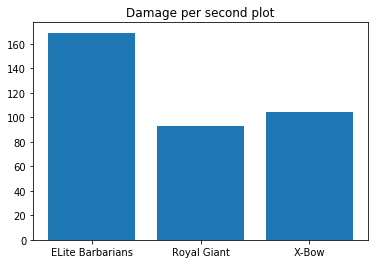

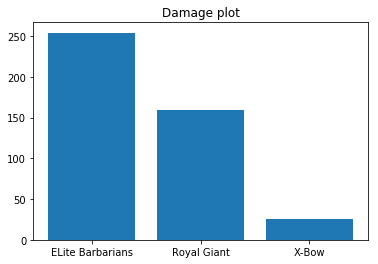

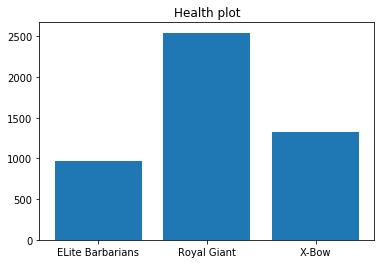

In [20]:
Ebarbs = main_stats.loc['Elite Barbarians']
RG = main_stats.loc['Royal Giant']
xbow = main_stats.loc['X-Bow']
OP_card_labels = ['ELite Barbarians', 'Royal Giant', 'X-Bow']
OP_card_list = [Ebarbs, RG, xbow]
dps_arr = []
damage_arr = []
health_arr = []
[dps_arr.append(card['Damage per second']) for card in OP_card_list]
[damage_arr.append(card['Damage']) for card in OP_card_list]
[health_arr.append(card['Health (+Shield)']) for card in OP_card_list]

f, ax1 = plt.subplots()
ax1.bar(OP_card_labels, dps_arr)
ax1.set_title('Damage per second plot')
#plt.bar(OP_card_labels, dps_arr)

f, ax2 = plt.subplots()
ax2.bar(OP_card_labels, damage_arr)
ax2.set_title('Damage plot')

f, ax3 = plt.subplots()
ax3.bar(OP_card_labels, health_arr)
ax3.set_title('Health plot')

plt.show()